In [3]:
import sys
import matplotlib.pyplot as plt
import numpy as np

!pip install -U scikit-learn
import sklearn
import sklearn.datasets as datasets
%matplotlib inline 

!pip install pandas
import pandas

import warnings
warnings.filterwarnings('ignore')

print('Python: {}'.format(sys.version))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('NumPy: {}'.format(np.__version__))


from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score


np.random.seed(42)




Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Scikit-learn: 1.4.1.post1
NumPy: 1.26.1


# Short simulation

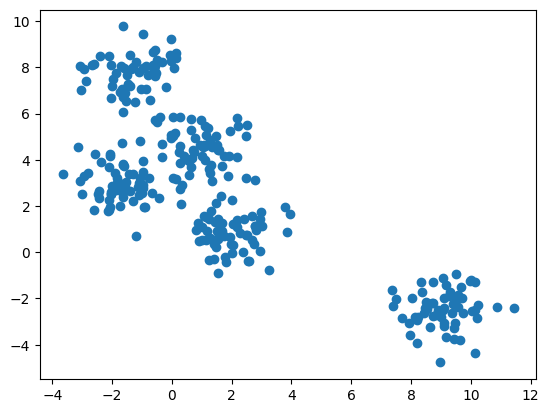

In [15]:
# Generate random data
X, Y = datasets.make_blobs(centers=5, cluster_std=0.8, random_state=0, n_samples=300)

# Observe the data that you will manipulate
plt.jet() 
plt.scatter(X[:,0], X[:,1])
plt.show()

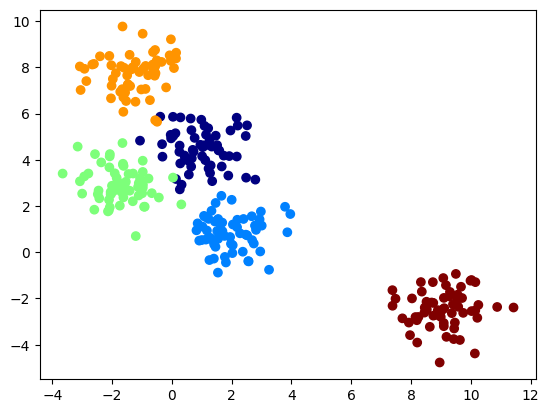

In [16]:
plt.scatter(X[:,0], X[:,1], c=Y)
# plt.savefig('temporary/short_simulation_generate_data.png')
plt.show()

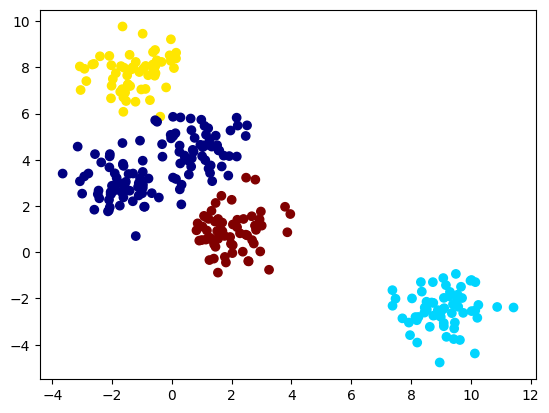

In [17]:
##**** Apply K-means clustering with k=4 then k=5 ***##
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0) 
Y_hat = kmeans.fit(X).labels_
color = Y_hat
plt.scatter(X[:,0], X[:,1], c=color)
plt.show()

[[-0.43064162  3.71516389]
 [ 9.07210298 -2.46057259]
 [-1.2506233   7.76363258]
 [ 2.00791599  0.9017771 ]]


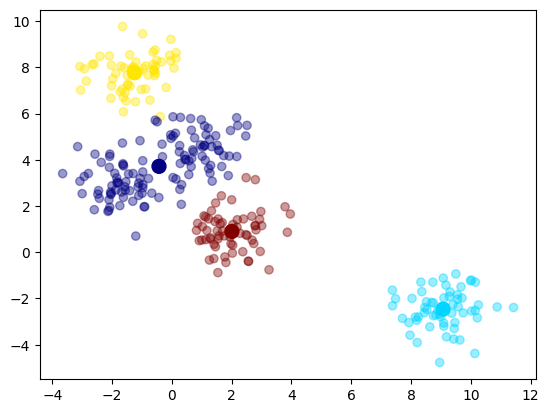

In [18]:
##**** On the figure above, plot the centroids of the resulting clusters ***##
plt.scatter(X[:,0], X[:,1], c=Y_hat, alpha=0.4)
mu = kmeans.cluster_centers_
color_mu = color[:mu.shape[0]] 
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(Y_hat))
# plt.savefig('temporary/short_simulation_kmeans.png')
print(mu)

## K-Medoids
On répète ici l'opération avec l'algorithme K-Medoids

In [19]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids



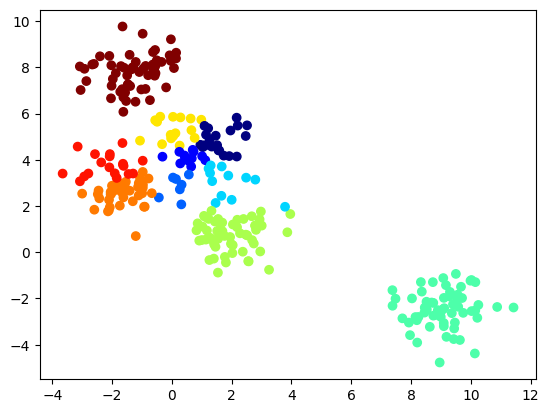

In [20]:
kmedoids = KMedoids(10, random_state=0) 
Y_hat = kmedoids.fit(X).labels_
plt.scatter(X[:,0], X[:,1], c=Y_hat)
plt.show()

[[ 1.51410588  4.6297568 ]
 [ 0.4688124   4.01359439]
 [ 0.32575305  2.92276125]
 [ 1.88779063  3.31592667]
 [ 9.06393885 -2.47696545]
 [ 1.75992205  0.70616032]
 [ 0.11966798  5.14734871]
 [-1.67942681  2.60200265]
 [-2.09066423  3.67249084]
 [-1.08881562  7.79497718]]


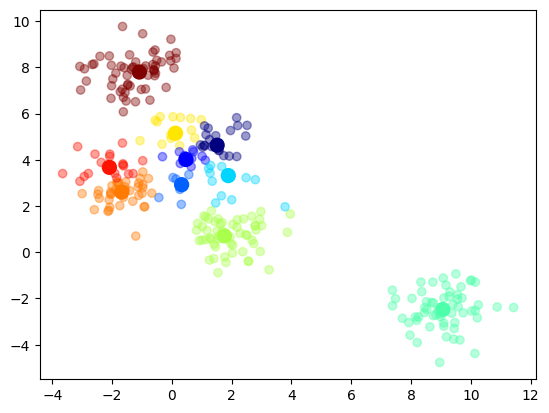

In [22]:
##**** On the figure above, plot the centroids of the resulting clusters ***##
plt.scatter(X[:,0], X[:,1], c=Y_hat, alpha=0.4)
mu = kmedoids.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(Y_hat))
plt.savefig('temporary/short_simulation_kmedoids.png')
print(mu)

# Gaussien mixture model

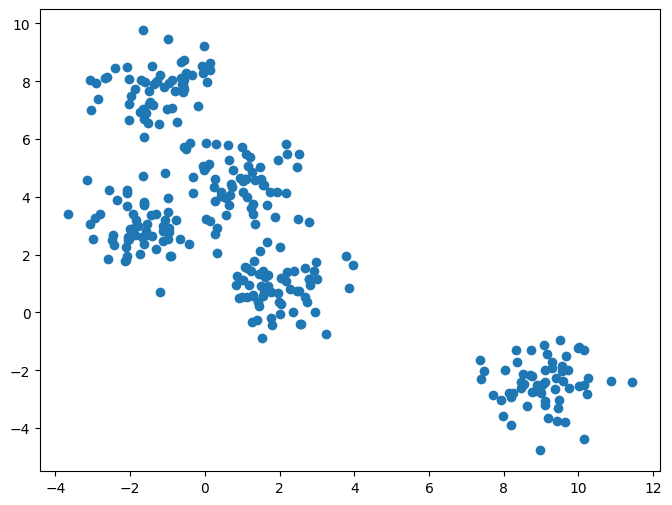

In [23]:
from sklearn.mixture import GaussianMixture

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1])
plt.show() 

[[-0.39869123  3.7253324 ]
 [ 9.07210298 -2.46057259]
 [-1.26105585  7.7901757 ]
 [ 1.98911181  0.86021347]]


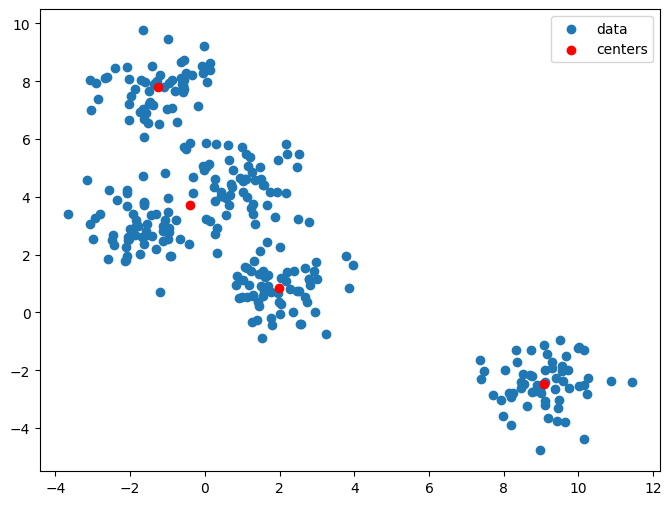

In [24]:
gm = GaussianMixture(n_components=4).fit(X)
centers = gm.means_
print(centers)
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")
plt.legend()
plt.savefig('temporary/short_simulation_gmm.png')
plt.show()

## DBSCAN

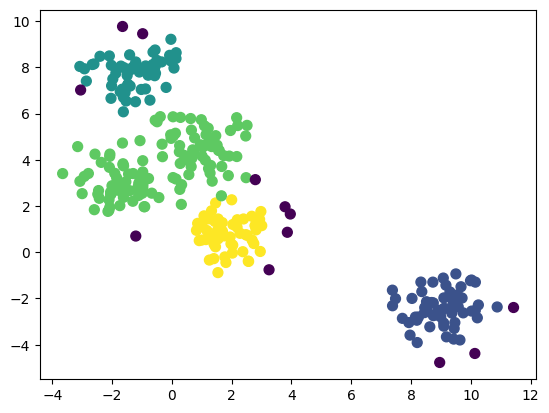

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.2)
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.savefig('temporary/short_simulation_dbscan.png')


# K-means Clustering on MNIST digit data

## 1. Visualise MNIST digit data

In [26]:
# Load 28*28 MNIST Images
from sklearn.datasets import fetch_openml
X_digits, Y_digits = fetch_openml('mnist_784', version=1, return_X_y=True)

##**** Take only 10000 instances to shorten runtime of KMeans ***##
X_digits = X_digits[0:10000]       
Y_digits = Y_digits[0:10000]
n_samples, n_features = X_digits.shape
n_digits = len(np.unique(Y_digits))


##**** Print the number of classes, number of features, number of samples ***##
print (n_digits)
print ("n_features: %d" % n_features)
print ("n_samples: %d" % n_samples)


10
n_features: 784
n_samples: 10000


In [27]:
##**** Visualize the values of Y-digits
print(Y_digits)
##**** Thus, explain to what refer X_digits and Y_digits ***##

##**** Print the number of samples per class ***##
X_digits=np.array(X_digits)
Y_digits=np.array(Y_digits)
Y_int=Y_digits.astype(int)
print("n_samples per group: %s" % np.bincount(Y_int))

0       5
1       0
2       4
3       1
4       9
       ..
9995    5
9996    8
9997    6
9998    9
9999    7
Name: class, Length: 10000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
n_samples per group: [1001 1127  991 1032  980  863 1014 1070  944  978]


Class: 3


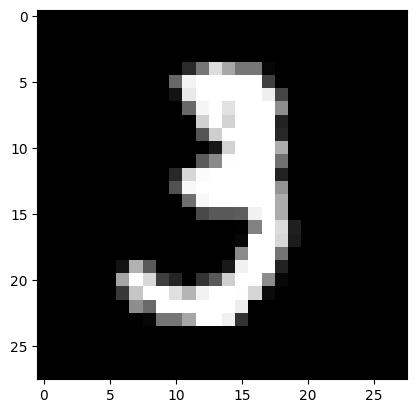

In [7]:
##**** Show an exemple of MNIST data ***##
p=10
plt.imshow(X_digits[p].reshape((28,28)), cmap='gray')
print("Class: %s" % Y_digits[p])

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4' '3' '5' '3' '6' '1' '7' '2' '8'
 '6' '9']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


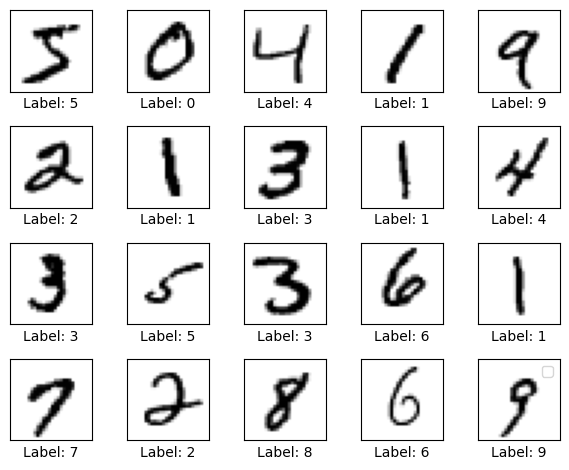

In [8]:
##**** Display twenty images, simultaneously, in grey-scale level and their associated label ***##

plt.rc("image", cmap="binary") 
print(Y_digits[:20])
for i in range(20):
    plt.subplot(4,5,i+1)    
    plt.imshow(X_digits[i].reshape(28,28))
    plt.tight_layout()
    plt.xticks(())
    plt.yticks(())
    plt.xlabel('Label: {}'.format(Y_digits[i]))
plt.legend()
plt.tight_layout()
plt.savefig('mnist_plot.png')

## 2. Apply K-Means

******** KMEANS completed ********


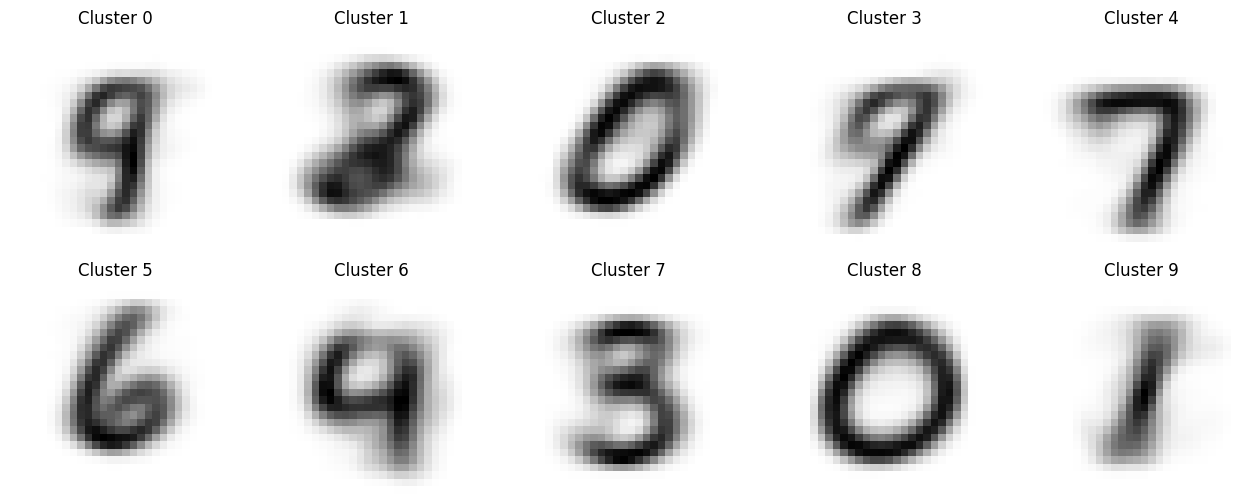

In [8]:
##**** Apply K-means with K=5 ***##
from sklearn.cluster import KMeans
n_clusters=10
kmeans = KMeans(n_clusters=n_clusters, init="k-means++")
model=kmeans.fit(X_digits)

print("******** KMEANS completed ********")

centroid_digits = model.cluster_centers_

# Unsupervised classification of data
clusters=model.predict(X_digits) 

##**** Visualize the centroids ***##
# Visualize it on two lines with 5 images on each line
plt.figure(figsize=(16,6))
for i in range(n_clusters): 
    plt.subplot(2,5,i+1)
    plt.imshow(centroid_digits[i].reshape(28,28), cmap='binary')
    plt.title('Cluster %d' % i)
    plt.axis('off')
plt.savefig('temporary/mnist_kmeans_ten_clusters.png', bbox_inches='tight', pad_inches=0.1)
plt.show()
##**** Analyze finely the obtained centroids ***##

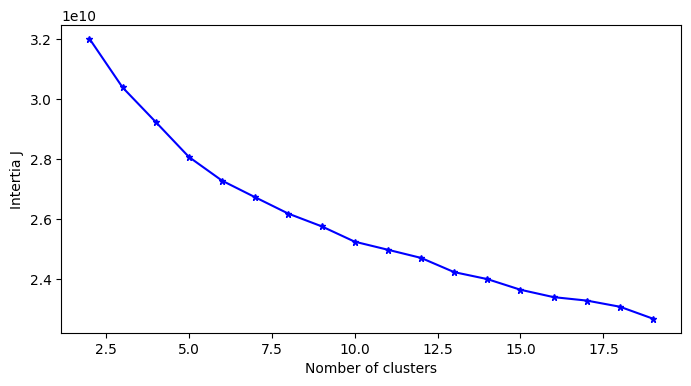

In [14]:
##**** Plot the Cost Function(Inertia) of the model as a function of K (range : 2 to 13) ***##
def plot_inertia(X_digits):
    inertia=[]  
    K_range=range(2,20)
    for k in K_range:
        model=KMeans(n_clusters = k).fit(X_digits)
        inertia.append(model.inertia_) 

    plt.figure(figsize=((8,4)))
    plt.plot(K_range,inertia, marker='*', color='blue', markersize=5)
    plt.xlabel('Nomber of clusters')
    plt.ylabel('Intertia J')
    plt.savefig('temporary/mnist_kmeans_inertia.png', bbox_inches='tight', pad_inches=0.1)
    plt.show()

plot_inertia(X_digits)   
##**** What do you observe ? ***##

## 3. Find the best number K of clusters

In [40]:
##**** Study K (range : 2 to 13) using the clustering metric: Silhouette ***##

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(X_digits):
    silhouette=[]
    K_range = range(2,13)
    for k in K_range:
        clusterer = KMeans(n_clusters = k)
        cluster_labels = clusterer.fit_predict(X_digits)
        silhouette_avg = silhouette_score(X_digits, cluster_labels)
        print("For k =", k, ", Average Silhouette Score :", round(silhouette_avg,4))
        silhouette.append(silhouette_avg)
    
    plt.figure(figsize=((8,4)))
    plt.plot(K_range,silhouette, marker='*', markersize=5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average Silhouette')
    plt.savefig('temporary/mnist_kmeans_silhouette.png', bbox_inches='tight', pad_inches=0.1)
    plt.show()

plot_silhouette(X_digits)

##**** Analyze the obtained curve and what do you conclude on the best value of K ***##

## 4. Evaluate the quality of the clustering based on the original labels using different tools

In [78]:
from sklearn.cluster import KMeans

n_clusters=10
kmeans = KMeans(n_clusters=n_clusters, init="k-means++")
model=kmeans.fit(X_digits)
centroid_digits = model.cluster_centers_

# Unsupervised classification of data
clusters=model.predict(X_digits) 


In [79]:
##**** Tool 1 : Use confusion matrix reporting the distribution of the images of a given class (lines) in each cluster (column) ***##

print("******** KMEANS completed ********")

centroid_digits = model.cluster_centers_

# Unsupervised classification of data
clusters=model.predict(X_digits) 

conf_matrix=sklearn.metrics.confusion_matrix(Y_int, clusters)
print(conf_matrix)

##**** Analyze the results and accordingly conclude on the quality of the clustering  ***##
##**** Perfom a clustering with the best value of K. Analyze the quality of the clustering ***##

******** KMEANS completed ********
[[  37    0    2   20  776    1    3   46  111    5]
 [   1    1 1099    0    0    0   20    1    2    3]
 [  28    4  169   20    7    0   12   64   27  660]
 [   9    9   61    6    6    2   60  613  238   28]
 [  11   15   41  319    0  429  163    0    0    2]
 [  21    7  191   25    9   39   66  232  271    2]
 [ 784    0   88   99   14    0    1    5   14    9]
 [   0  529   55  101    1   25  354    1    1    3]
 [  15    7  110   27    4   36   47  217  475    6]
 [   3  201   21  218    5  208  307   12    3    0]]


In [80]:
## Study of the confusion matrix
### By column
# conf_matrix = conf_matrix[:, :-3]
print(conf_matrix)
conf_matrix_normalized = conf_matrix / conf_matrix.sum(axis=0)
print(np.round(conf_matrix_normalized, decimals=2))
print(np.round(np.var(conf_matrix_normalized, axis=0), decimals=3))


[[  37    0    2   20  776    1    3   46  111    5]
 [   1    1 1099    0    0    0   20    1    2    3]
 [  28    4  169   20    7    0   12   64   27  660]
 [   9    9   61    6    6    2   60  613  238   28]
 [  11   15   41  319    0  429  163    0    0    2]
 [  21    7  191   25    9   39   66  232  271    2]
 [ 784    0   88   99   14    0    1    5   14    9]
 [   0  529   55  101    1   25  354    1    1    3]
 [  15    7  110   27    4   36   47  217  475    6]
 [   3  201   21  218    5  208  307   12    3    0]]
[[0.04 0.   0.   0.02 0.94 0.   0.   0.04 0.1  0.01]
 [0.   0.   0.6  0.   0.   0.   0.02 0.   0.   0.  ]
 [0.03 0.01 0.09 0.02 0.01 0.   0.01 0.05 0.02 0.92]
 [0.01 0.01 0.03 0.01 0.01 0.   0.06 0.51 0.21 0.04]
 [0.01 0.02 0.02 0.38 0.   0.58 0.16 0.   0.   0.  ]
 [0.02 0.01 0.1  0.03 0.01 0.05 0.06 0.19 0.24 0.  ]
 [0.86 0.   0.05 0.12 0.02 0.   0.   0.   0.01 0.01]
 [0.   0.68 0.03 0.12 0.   0.03 0.34 0.   0.   0.  ]
 [0.02 0.01 0.06 0.03 0.   0.05 0.05 0.18 0.4

In [81]:
conf_matrix = conf_matrix.T
print(conf_matrix)
conf_matrix_normalized = conf_matrix / conf_matrix.sum(axis=0)
print(np.round(conf_matrix_normalized, decimals=2))
variances = np.var(conf_matrix_normalized, axis=0)
print(np.var(conf_matrix_normalized, axis=0))
print(np.round(variances, decimals=3))
print(np.mean(variances))

[[  37    1   28    9   11   21  784    0   15    3]
 [   0    1    4    9   15    7    0  529    7  201]
 [   2 1099  169   61   41  191   88   55  110   21]
 [  20    0   20    6  319   25   99  101   27  218]
 [ 776    0    7    6    0    9   14    1    4    5]
 [   1    0    0    2  429   39    0   25   36  208]
 [   3   20   12   60  163   66    1  354   47  307]
 [  46    1   64  613    0  232    5    1  217   12]
 [ 111    2   27  238    0  271   14    1  475    3]
 [   5    3  660   28    2    2    9    3    6    0]]
[[0.04 0.   0.03 0.01 0.01 0.02 0.77 0.   0.02 0.  ]
 [0.   0.   0.   0.01 0.02 0.01 0.   0.49 0.01 0.21]
 [0.   0.98 0.17 0.06 0.04 0.22 0.09 0.05 0.12 0.02]
 [0.02 0.   0.02 0.01 0.33 0.03 0.1  0.09 0.03 0.22]
 [0.78 0.   0.01 0.01 0.   0.01 0.01 0.   0.   0.01]
 [0.   0.   0.   0.   0.44 0.05 0.   0.02 0.04 0.21]
 [0.   0.02 0.01 0.06 0.17 0.08 0.   0.33 0.05 0.31]
 [0.05 0.   0.06 0.59 0.   0.27 0.   0.   0.23 0.01]
 [0.11 0.   0.03 0.23 0.   0.31 0.01 0.   0.5

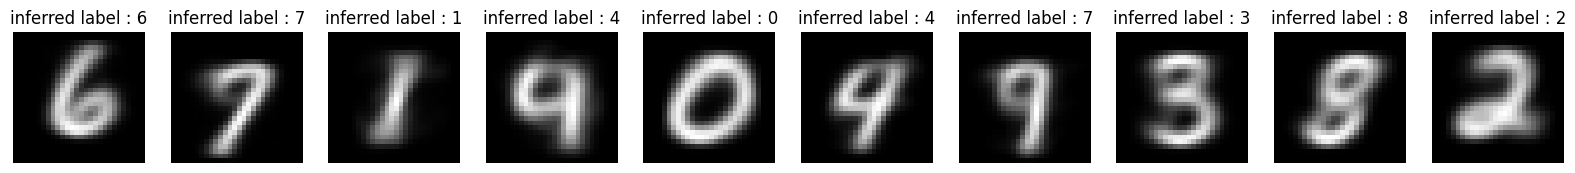

In [82]:
##**** Tool 2 : Infer a label to each resulting cluster based on the most represented label in the cluster ***##

def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

cluster_labels = infer_cluster_labels(model, Y_int)
ig, axs = plt.subplots(1,n_clusters,figsize=(20,20))
plt.gray()
for i,ax in enumerate(axs.flat):    
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('inferred label : {}'.format(key))          
    ax.imshow(centroid_digits[i].reshape(28,28))
    ax.axis('off')
# plt.savefig('temporary/mnist_kmeans_inferred_labels_ten_clusters.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

##**** Analyze the inferred labels with the best value of K. Conclude ***##

In [32]:
##**** Tool 3 : Use Entropy metric ***##
import scipy
entropie = np.zeros(n_clusters)
for i in range(n_clusters):
    ind = X_digits[clusters==i]
    entropie[i] = scipy.stats.entropy(clusters==i)

print("Entropies=", entropie)
print("Average Entropy =", round(entropie.mean(),3))
diff_entropie = np.abs(entropie-entropie.mean())
print("Difference with average entropy =", np.abs(np.round(entropie-entropie.mean(),3)))
print("Entropy variance =", round(entropie.var(),3))


Entropies= [7.43838353 7.66575343 7.12447826 7.36581284 6.77193556 6.90775528
 7.29301768]
Average Entropy = 7.224
Difference with average entropy = [0.215 0.442 0.099 0.142 0.452 0.316 0.069]
Entropy variance = 0.083


Cluster  4  presents the lowest entropy value = 6.771935555839601


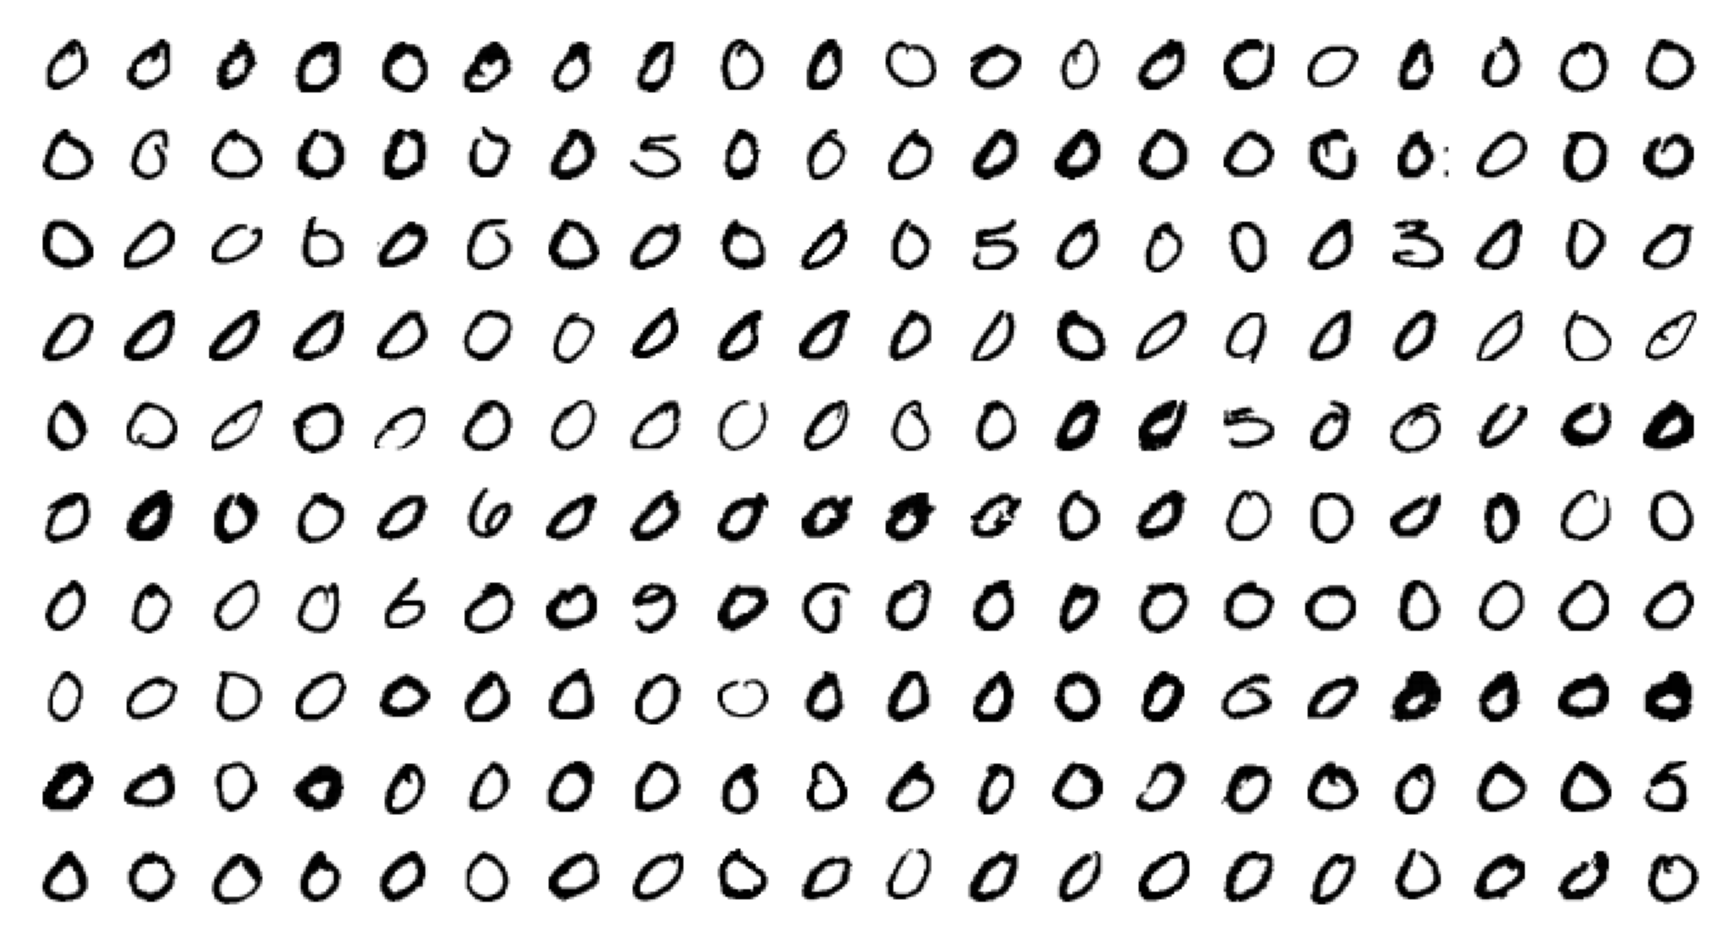

In [34]:
indmin = np.argmin(entropie)

print("Cluster ", indmin," presents the lowest entropy value =",entropie[indmin])
imc = X_digits[clusters==indmin]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
 plt.axis('off')
# plt.savefig('temporary/mnist_kmeans_low_entropy_cluster.png', bbox_inches='tight', pad_inches=0.1)

Cluster  0  presents the highest entropy value = 7.438383530044307


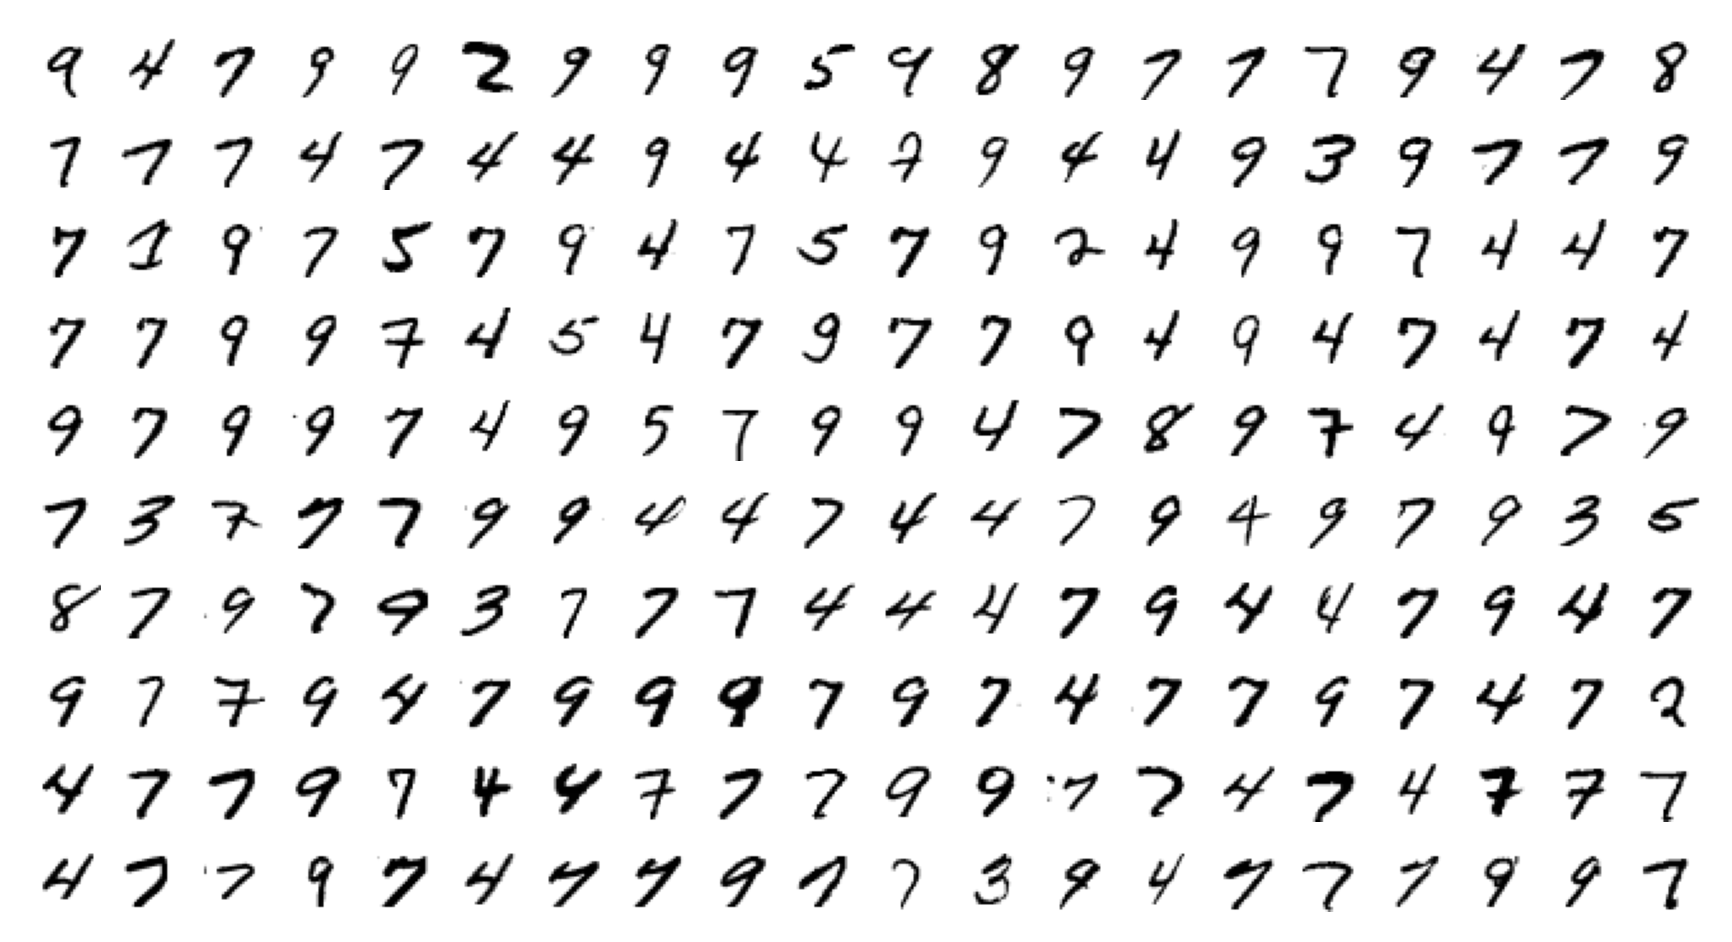

In [37]:
# indmax = np.argmax(entropie)
indmax = 0
print("Cluster ", indmax," presents the highest entropy value =",entropie[indmax])
imc = X_digits[clusters==indmax]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
 plt.axis('off')

# plt.savefig('temporary/mnist_kmeans_confusion_high_entropy_cluster.png', bbox_inches='tight', pad_inches=0.1)

Cluster  1  presents the highest entropy value = 7.6657534318617


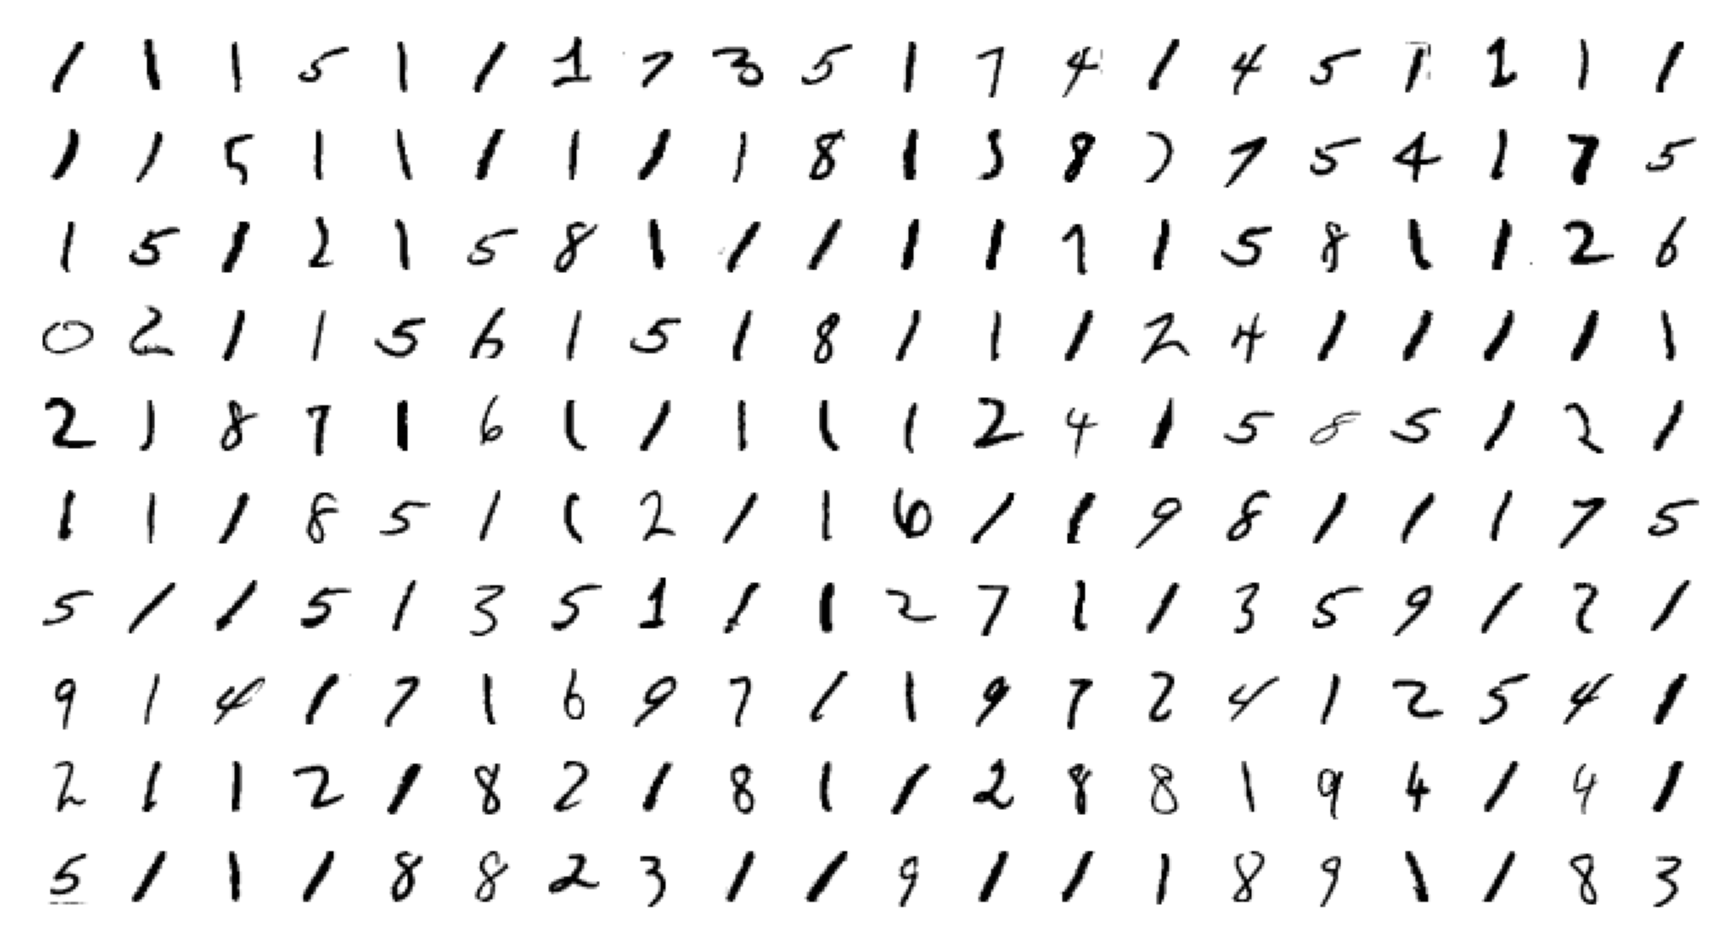

In [38]:
indmax = np.argmax(entropie)

print("Cluster ", indmax," presents the highest entropy value =",entropie[indmax])
imc = X_digits[clusters==indmax]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
 plt.axis('off')

# plt.savefig('temporary/mnist_kmeans_high_entropy_cluster.png', bbox_inches='tight', pad_inches=0.1)

In [42]:
# Test different number of clusters
clu=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]

succ_perc_pear_k = []
for n_clust in clu:
    estimator = KMeans(n_clusters = n_clust, init="k-means++",n_init=4)
    estimator.fit(X_digits)
     
    # Determine the inferred label of each cluster
    cluster_labels = infer_cluster_labels(estimator, Y_int)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # Compute and display the percentage of total good classification 
    acc=metrics.accuracy_score(Y_int, predicted_Y)
    acc=acc*100
    succ_perc_pear_k.append(acc)
    print("For k =", n_clust, ', Good distribution of : {}%\n'.format(round(acc,2)))

For k = 2 , Good distribution of : 20.93%

For k = 3 , Good distribution of : 30.04%

For k = 4 , Good distribution of : 37.96%

For k = 5 , Good distribution of : 45.54%

For k = 6 , Good distribution of : 47.53%

For k = 7 , Good distribution of : 52.86%

For k = 8 , Good distribution of : 56.59%

For k = 9 , Good distribution of : 55.99%

For k = 10 , Good distribution of : 56.74%

For k = 11 , Good distribution of : 58.31%

For k = 12 , Good distribution of : 65.13%

For k = 13 , Good distribution of : 63.04%

For k = 14 , Good distribution of : 66.7%

For k = 15 , Good distribution of : 67.84%



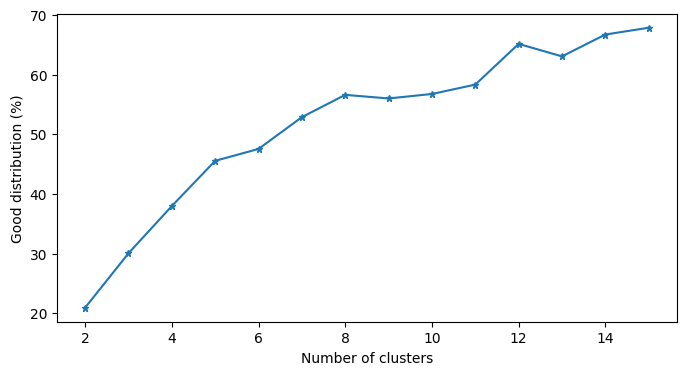

In [44]:
# display the percentage of good classification for each k
plt.figure(figsize=(8,4))
plt.plot(clu,succ_perc_pear_k, marker='*', markersize=5)
plt.xlabel('Number of clusters')
plt.ylabel('Good distribution (%)')
# plt.savefig('temporary/mnist_kmeans_good_distribution.png', bbox_inches='tight', pad_inches=0.1)

In [48]:
# Load 28*28 MNIST Images
from sklearn.datasets import fetch_openml
X_digits, Y_digits = fetch_openml('mnist_784', version=1, return_X_y=True)

##**** Take only 10000 instances to shorten runtime of KMeans ***##
X_digits = X_digits[0:10000]       
Y_digits = Y_digits[0:10000]
n_samples, n_features = X_digits.shape
n_digits = len(np.unique(Y_digits))
##**** Visualize the values of Y-digits
print(Y_digits)
##**** Thus, explain to what refer X_digits and Y_digits ***##

##**** Print the number of samples per class ***##
X_digits=np.array(X_digits)
Y_digits=np.array(Y_digits)
Y_int=Y_digits.astype(int)
# COMPARAISON 8, 10, 12 clusters
cluster_size = [8, 10, 12]

centroids = np.random.rand(max(cluster_size), 28*28)
models = []
cluster_labels = []
for k in cluster_size:
    kmeans = KMeans(n_clusters=k, init=centroids[:k], n_init=1)
    model = kmeans.fit(X_digits)
    centroids[:k] = model.cluster_centers_
    models.append(model)
    cluster_labels.append(infer_cluster_labels(model, Y_int))
    

0       5
1       0
2       4
3       1
4       9
       ..
9995    5
9996    8
9997    6
9998    9
9999    7
Name: class, Length: 10000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [77]:

# Confusion matrix
confusion_matrix = []
for k, model in zip(cluster_size, models):
    confusion_matrix.append(sklearn.metrics.confusion_matrix(Y_int, model.labels_)[:, :k])

# Normalized confusion matrix
conff_matrix_normalized = []
for conf_matrix in confusion_matrix:
    conff_matrix_normalized.append(conf_matrix[:k] / conf_matrix.sum(axis=0))
    
# Variance of the normalized confusion matrix
variances = []
for conf_matrix_normalized in conff_matrix_normalized:
    variances.append(np.var(conf_matrix_normalized, axis=0))

# Print variance vector
for variance in variances:
    print(np.round(variance, decimals=3))
    print(np.mean(variance))


cluster_centers = [model.cluster_centers_ for model in models]
# Visualize the centroids of the clusters for each number of clusters

for i, centers in enumerate(cluster_centers):
    for j, center in enumerate(centers):
        plt.subplot(i * 12 + j + 1, figsize=(12, 14))
        plt.imshow(center.reshape(28, 28), cmap='binary')
        plt.axis('off')

        if j == 0:
            plt.title('Number of cluesters = {}'.format(cluster_size[i]))
plt.show()
# plt.savefig('temporary/mnist_kmeans_centroids_comparison.png', bbox_inches='tight', pad_inches=0.1)

[0.077 0.017 0.018 0.013 0.012 0.02  0.033 0.03 ]
0.02745359586727366
[0.079 0.021 0.019 0.015 0.052 0.02  0.013 0.073 0.064 0.024]
0.037915677291321497
[0.056 0.021 0.018 0.015 0.048 0.029 0.032 0.067 0.057 0.024 0.013 0.067]
0.03716152546747153


AttributeError: Axes.set() got an unexpected keyword argument 'figsize'

<Figure size 640x480 with 0 Axes>

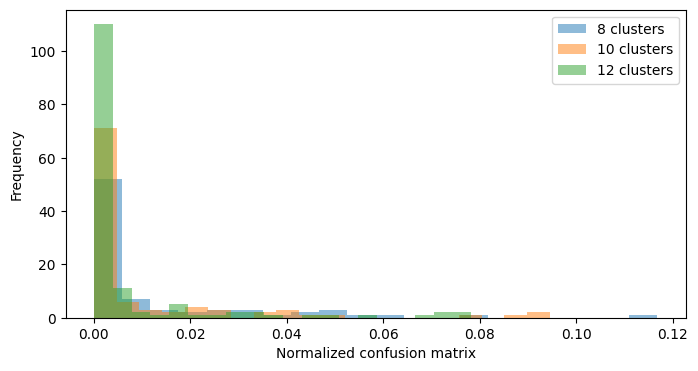

In [95]:

# Display an histogram of the normalized confusion matrix for each number of clusters on the same figure 
plt.figure(figsize=(8, 4))
for i, conf_matrix_normalized in enumerate(conff_matrix_normalized):
    plt.hist(conf_matrix_normalized.flatten()/np.sum(conf_matrix_normalized), bins=20, alpha=0.5)
    plt.legend(['{} clusters'.format(k) for k in cluster_size])

plt.xlabel('Normalized confusion matrix')
plt.ylabel('Frequency')
plt.savefig('temporary/mnist_kmeans_normalized_confusion_matrix_comparaison.png', bbox_inches='tight', pad_inches=0.1)
plt.show()




In [101]:
# Entropy
import scipy
entropies = []
for k, model in zip(cluster_size, models):
    clusters = model.predict(X_digits)
    entropie = np.zeros(k)
    for i in range(k):
        ind = X_digits[clusters==i]
        entropie[i] = scipy.stats.entropy(clusters==i)
    entropies.append(entropie)
    

# Print entropy vector
for k, entropie in zip(cluster_size, entropies):
    print("For k =", k)
    print("Entropies=", np.round(entropie, decimals=3))
    print("Average Entropy =", round(entropie.mean(),3))
    diff_entropie = np.abs(entropie-entropie.mean())
    print("Difference with average entropy =", np.abs(np.round(entropie-entropie.mean(),3)))
    print("Entropy variance =", round(entropie.var(),3))

For k = 8
Entropies= [6.783 7.054 7.12  6.906 7.204 7.519 6.869 7.363]
Average Entropy = 7.102
Difference with average entropy = [0.319 0.049 0.017 0.196 0.102 0.417 0.233 0.26 ]
Entropy variance = 0.056
For k = 10
Entropies= [6.713 6.946 7.088 6.854 6.593 7.039 7.195 6.592 6.784 7.07 ]
Average Entropy = 6.887
Difference with average entropy = [0.175 0.059 0.201 0.033 0.294 0.151 0.308 0.296 0.103 0.182]
Entropy variance = 0.041
For k = 12
Entropies= [6.284 6.873 7.076 6.819 6.56  6.818 6.698 6.553 6.693 7.041 6.777 6.091]
Average Entropy = 6.69
Difference with average entropy = [0.406 0.183 0.386 0.129 0.131 0.128 0.008 0.138 0.003 0.35  0.086 0.599]
Entropy variance = 0.075


# K-medoïd Clustering on MNIST Digit

In [ ]:
from sklearn_extra.cluster import KMedoids
# TO COMPLETE for clustering MNIST DIGIT

# Gaussian Mixture Model for Clustering 


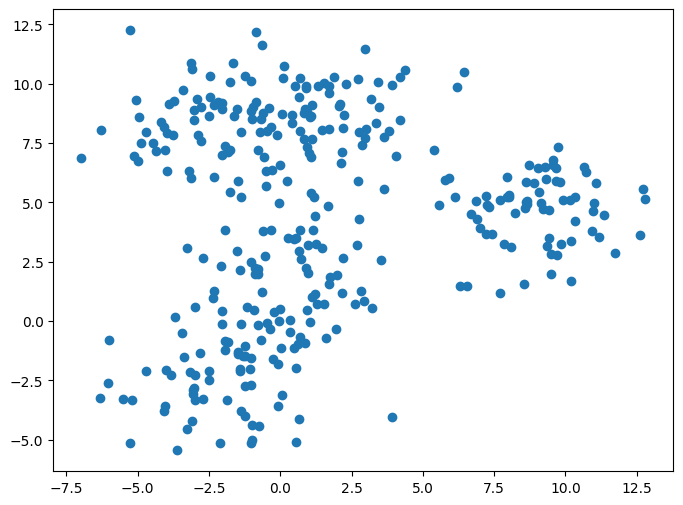

In [102]:
from sklearn.mixture import GaussianMixture
x, _ = datasets.make_blobs(n_samples=330, centers=5, cluster_std=1.84)

plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1])
plt.show() 

In [103]:
gm = GaussianMixture(n_components=5).fit(x)
#gm.get_params() 

In [104]:
centers = gm.means_
print(centers)
  

[[-0.13790946  2.8295822 ]
 [ 8.97140225  4.65635296]
 [-2.43188378 -3.36071006]
 [-0.39141737  8.49718135]
 [-0.1700414  -0.46616894]]


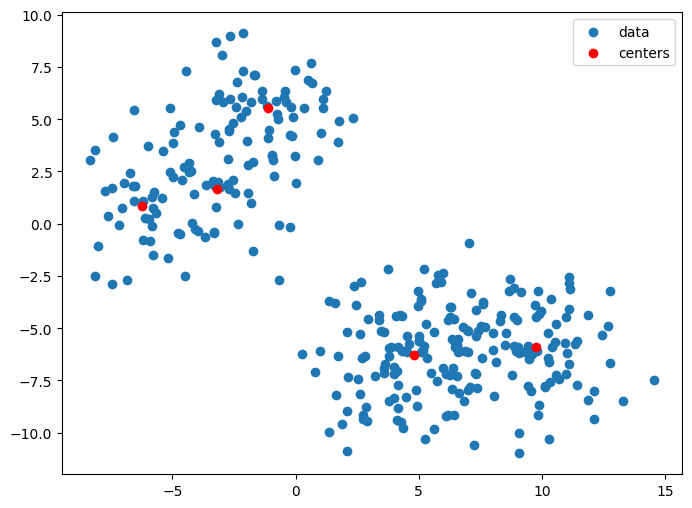

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")
plt.legend()
plt.show() 

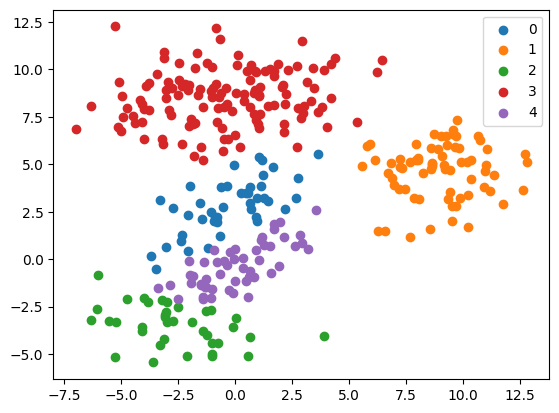

In [105]:
from pandas import DataFrame 
pred = gm.predict(x)

df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
groups = df.groupby('label')

ig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)

ax.legend()
plt.show() 

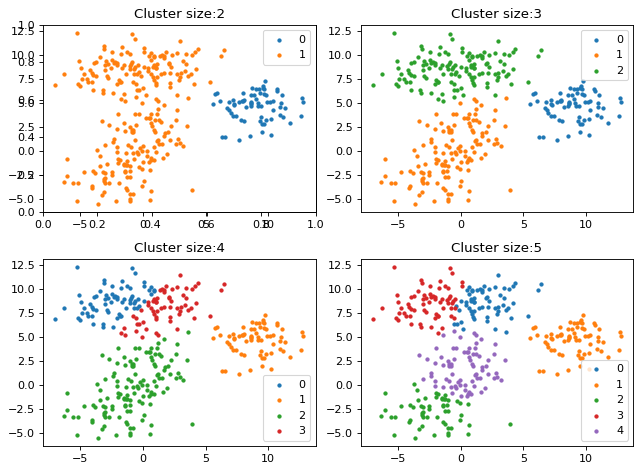

In [106]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
 gm = GaussianMixture(n_components=i).fit(x)
 pred = gm.predict(x)
 df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
 groups = df.groupby('label')
 f.add_subplot(2, 2, i-1)
 for name, group in groups:
    plt.scatter(group.x, group.y, label=name, s=8)
    plt.title("Cluster size:" + str(i))
    plt.legend()

plt.tight_layout()        
plt.show()  

# Limitation of K-Means

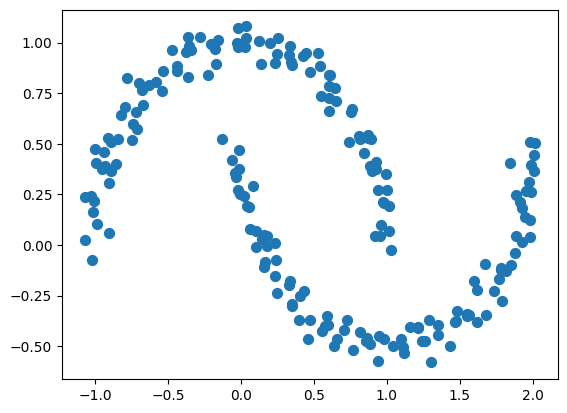

In [107]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='plasma')


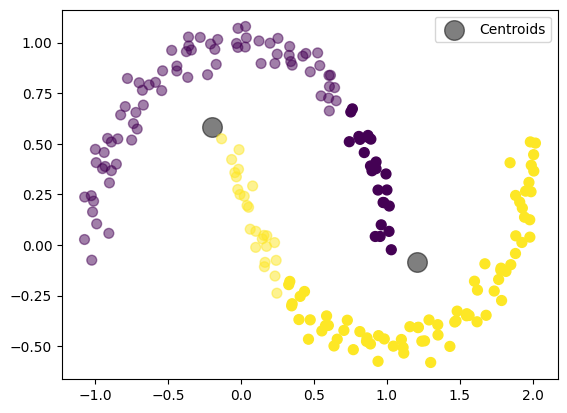

In [123]:
# To complete by the application of K-means and DBSCAN methods on such data
# Display the results of the clustering with K-means and DBSCAN
# K-means cluster will be displayed with the centroids and the alpha value of the points for each cluster
# DBSCAN cluster will be displayed with different color for each cluster

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', )

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, label='Centroids')


# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.3)
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis', alpha=(y_kmeans+1)/2)
plt.title('K-means and DBSCAN clustering')
plt.legend()

plt.savefig('temporary/moon_dbscan.png')



# K-Means for Compression / Segmentation

In [148]:
from skimage import io

Shape of the Image :  (450, 900, 3)


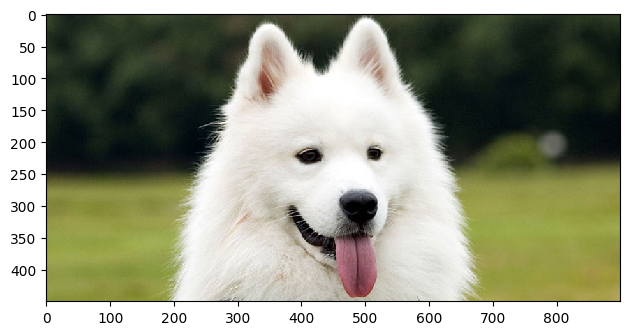

In [149]:
##**** Read the image 1 ***##
OrigImage = io.imread('Dog.png')
io.imshow(OrigImage)
print('Shape of the Image : ', OrigImage.shape)


In [150]:
##**** Reshape the image : convert the image into a vector BUT here each element of the vector is in 3D (RGB) ***##
rows, cols = OrigImage.shape[0], OrigImage.shape[1]
image = OrigImage.reshape(rows * cols, 3)
print(image.shape)
print(image[:4])

(405000, 3)
[[62 74 50]
 [61 73 49]
 [60 72 48]
 [58 70 46]]


In [151]:
##**** Apply K-Means on the image with K=5, K=10 and K=16 ***##
kMeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
model=kMeans.fit(image)

##**** Observe examples of Centeroids in RGB domain (3D) ***##
centers = np.asarray(model.cluster_centers_, dtype = np.uint8)
#centers

In [152]:
# labels 
labels = np.asarray(model.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
#labels

(405000,)
(450, 900)


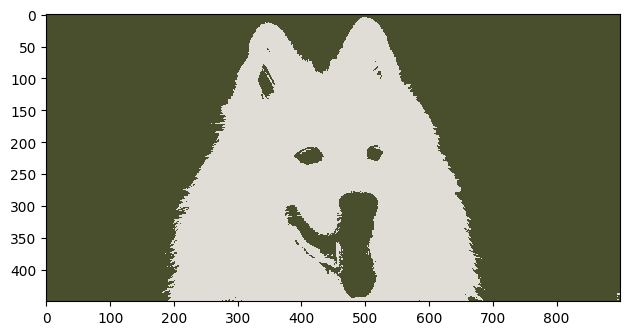

In [153]:
##**** Reconstruction of the image based on the segmentation obtained with K-means ***##
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # Assignment of every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
#io.imsave('dog-compressed.png', newImage);
io.imshow(newImage)
newImage.shape
# save the image
io.imsave('temporary/dog_segmented_two.png', newImage)

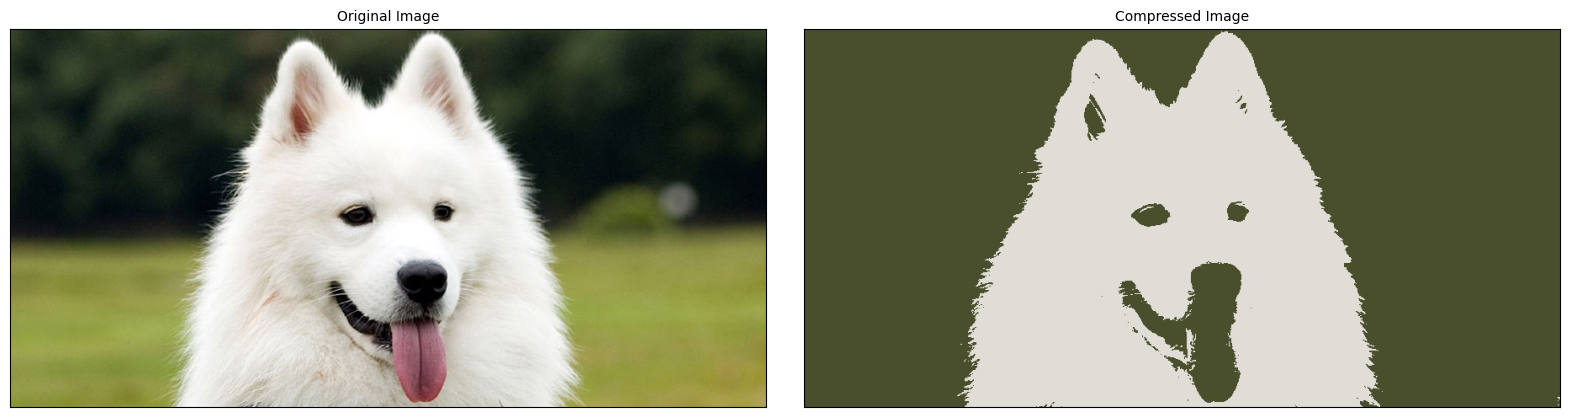

In [154]:
##**** Display the original and the compressed images side-by-side for a better comparion ***##
##**** Compare with different values of k clusters ***##

fig, ax = plt.subplots(1, 2, figsize=(20, 10),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(OrigImage)
ax[0].set_title('Original Image', size=10)
ax[1].imshow(newImage)
ax[1].set_title('Compressed Image', size=10)

plt.savefig('temporary/dog_compressed.png', bbox_inches='tight', pad_inches=0.1)

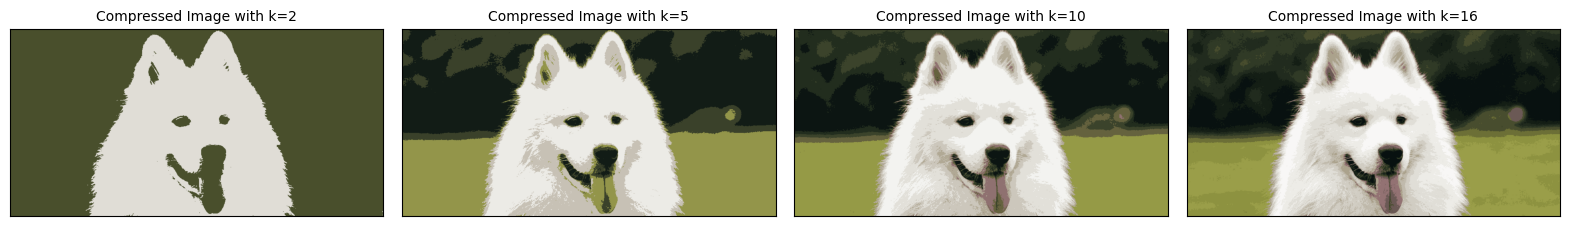

In [139]:
##**** Apply K-Means on the image with K=5, K=10 and K=16 ***##

cluster_size = [2, 5, 10, 16]

models = [
      KMeans(n_clusters=k, random_state=42, init='k-means++', max_iter=300, n_init=10).fit(image) 
      for k in cluster_size
      ]

centers = [np.asarray(model.cluster_centers_, dtype = np.uint8) for model in models]

labels = [np.asarray(model.labels_, dtype = np.uint8).reshape(rows, cols) for model in models]

new_images = [np.zeros((rows, cols, 3), dtype = np.uint8) for _ in range(len(cluster_size))]
for k, label, center in zip(range(len(cluster_size)), labels, centers):
    newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
    for i in range(rows):
        for j in range(cols):
            new_images[k][i, j, :] = center[label[i, j], :]
            



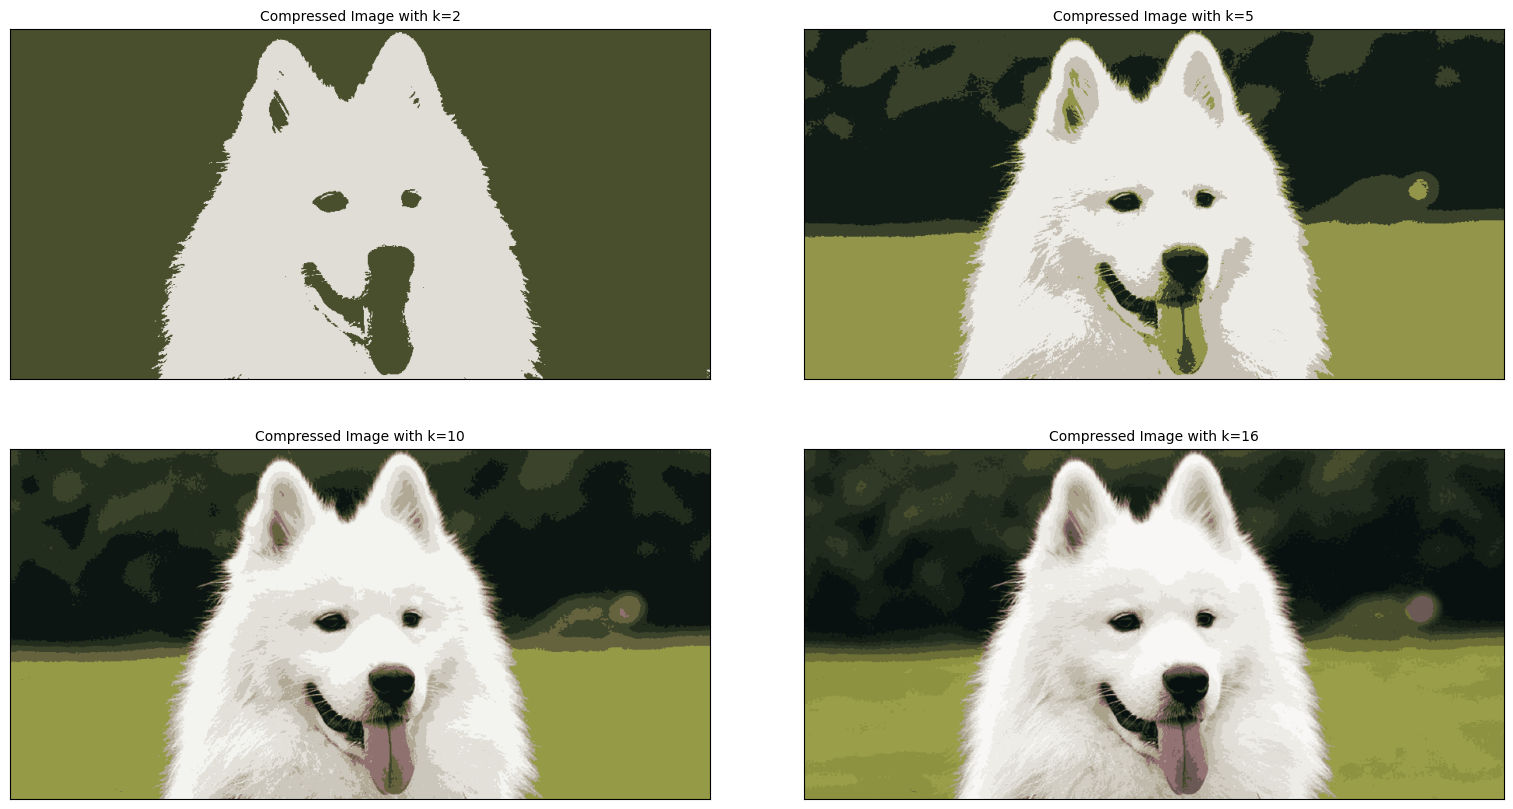

In [146]:

num_rows = 2
num_cols = len(cluster_size) // num_rows


fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 10), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05, hspace=0.2)  
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        ax[i, j].imshow(new_images[index])
        ax[i, j].set_title('Compressed Image with k={}'.format(cluster_size[index]), size=10)

plt.savefig('temporary/dog_segmented_comparaison.png', bbox_inches='tight', pad_inches=0.1)
